# Statistical Analisis for the VR-Claustrophobia investigation
## Author: [Juan Andrés Méndez Galvis](https://www.linkedin.com/in/juan-andres-mendez-galvis-027910165/)

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
# Data set file path:
vr_claustrophobia = 'data/testing.xlsx'

# Important sheet names:
# respuestas
# no-vr: columns from A to F are the responses to the questions, from G to L are the time spent of each question
# vr: columns from A to F are the responses to the questions, from G to L are the time spent of each question
# vr+virtual-win: Columns A to J are the responses to the questions, from K to T are the time spent of each question

# Create a dataframe for each sheet. In the case of  no-vr, vr and vr+virtual-win. Create 2 dataframes, one for the responses and another for the time spent.

df_answers = pd.read_excel(vr_claustrophobia, sheet_name='respuestas')
# No vr responses from A to F
df_no_vr = pd.read_excel(vr_claustrophobia, sheet_name='no-vr', usecols='A:F')
# No vr time spent from G to L
df_no_vr_time = pd.read_excel(vr_claustrophobia, sheet_name='no-vr', usecols='G:L')
# VR responses from A to F
df_vr = pd.read_excel(vr_claustrophobia, sheet_name='vr', usecols='A:F')
# VR time spent from G to L
df_vr_time = pd.read_excel(vr_claustrophobia, sheet_name='vr', usecols='G:L')
# VR+virtual-win responses from A to J
df_vr_virtual_win = pd.read_excel(vr_claustrophobia, sheet_name='vr+virtual-win', usecols='A:J')
# VR+virtual-win time spent from K to T
df_vr_virtual_win_time = pd.read_excel(vr_claustrophobia, sheet_name='vr+virtual-win', usecols='K:T')


In [268]:
# Now the first step is to make the first column the index of the dataframes

df_answers.set_index('# Pregunta', inplace=True)
df_no_vr.set_index('# Pregunta', inplace=True)
df_no_vr_time.set_index('# Pregunta.1', inplace=True)
df_vr.set_index('# Pregunta', inplace=True)
df_vr_time.set_index('# Pregunta.1', inplace=True)
df_vr_virtual_win.set_index('# Pregunta', inplace=True)
df_vr_virtual_win_time.set_index('# Pregunta.1', inplace=True)

# Eliminate nan indexes

df_no_vr.dropna(inplace=True)
df_no_vr_time.dropna(inplace=True)
df_vr.dropna(inplace=True)
df_vr_time.dropna(inplace=True)
df_vr_virtual_win.dropna(inplace=True)
df_vr_virtual_win_time.dropna(inplace=True)



/tmp/ipykernel_86151/3592599669.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Accuracy', data=df, palette="viridis")


Text(0, 0.5, 'Accuracy')

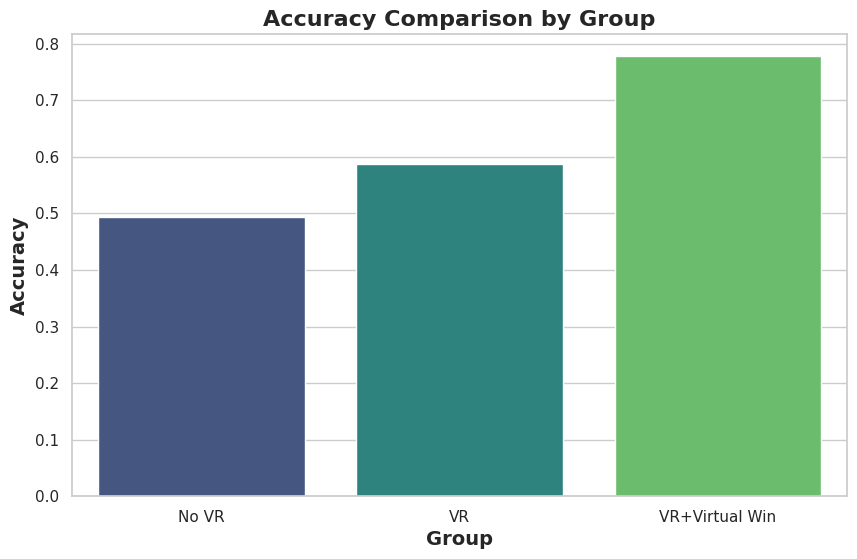

In [269]:

def calculate_accuracy(df_responses, df_answers):
    accuracy = 0
    num_columns = len(df_responses.columns)
    for column in df_responses.columns:
        correct_answers = 0
        for index in df_responses.index:
            response_value = df_responses.loc[index, column]
            answer_value = df_answers.loc[index, 'Rta']
            if pd.isna(response_value) or pd.isna(answer_value):
                continue
            if response_value == answer_value:
                correct_answers += 1
        accuracy += correct_answers / len(df_responses.index)

    accuracy = accuracy / num_columns

    return accuracy

accuracy_no_vr = calculate_accuracy(df_no_vr, df_answers)
accuracy_vr = calculate_accuracy(df_vr, df_answers)
accuracy_vr_virtual_win = calculate_accuracy(df_vr_virtual_win, df_answers)

# Define the data for the plot
data = {'Group': ['No VR', 'VR', 'VR+Virtual Win'], 'Accuracy': [accuracy_no_vr, accuracy_vr, accuracy_vr_virtual_win]}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Group', y='Accuracy', data=df, palette="viridis")

# Add title and labels
ax.set_title('Accuracy Comparison by Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')

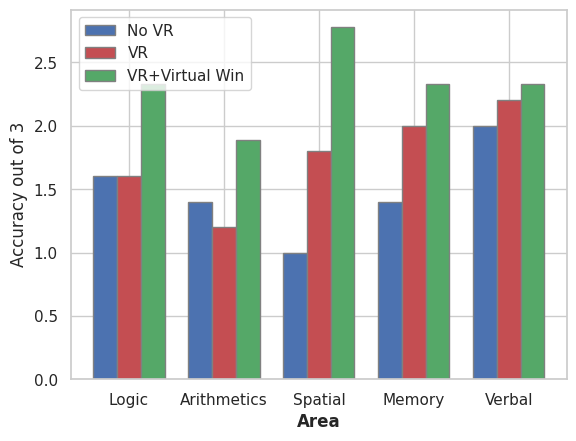

In [270]:
# The dataframe df_answers also has another column called Area, which is the area of the question. We can use this information to calculate the accuracy of the responses by area.

def calculate_accuracy_by_area(df_responses, df_answers):
    accuracy_by_area = {}
    num_columns = len(df_responses.columns)
    for column in df_responses.columns:
        for index in df_responses.index:
            response_value = df_responses.loc[index, column]
            answer_value = df_answers.loc[index, 'Rta']
            area = df_answers.loc[index, 'Area']
            if pd.isna(response_value) or pd.isna(answer_value):
                continue
            if area not in accuracy_by_area:
                accuracy_by_area[area] = 0
            if response_value == answer_value:
                accuracy_by_area[area] += 1

    for key in accuracy_by_area:
        accuracy_by_area[key] = accuracy_by_area[key] / num_columns

    return accuracy_by_area

accuracy_no_vr_by_area = calculate_accuracy_by_area(df_no_vr, df_answers)
accuracy_vr_by_area = calculate_accuracy_by_area(df_vr, df_answers)
accuracy_vr_virtual_win_by_area = calculate_accuracy_by_area(df_vr_virtual_win, df_answers)

accuracy_no_vr_by_area = list(accuracy_no_vr_by_area.items())
accuracy_vr_by_area = list(accuracy_vr_by_area.items())
accuracy_vr_virtual_win_by_area = list(accuracy_vr_virtual_win_by_area.items())

areas = [area for area, _ in accuracy_no_vr_by_area]
accuracy_no_vr_by_area = [accuracy for _, accuracy in accuracy_no_vr_by_area]
accuracy_vr_by_area = [accuracy for _, accuracy in accuracy_vr_by_area]
accuracy_vr_virtual_win_by_area = [accuracy for _, accuracy in accuracy_vr_virtual_win_by_area]

barWidth = 0.25

r1 = np.arange(len(accuracy_no_vr_by_area))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, accuracy_no_vr_by_area, color='b', width=barWidth, edgecolor='grey', label='No VR')
plt.bar(r2, accuracy_vr_by_area, color='r', width=barWidth, edgecolor='grey', label='VR')
plt.bar(r3, accuracy_vr_virtual_win_by_area, color='g', width=barWidth, edgecolor='grey', label='VR+Virtual Win')

plt.xlabel('Area', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy_no_vr_by_area))], areas)
plt.ylabel('Accuracy out of 3')
plt.legend()
plt.show()


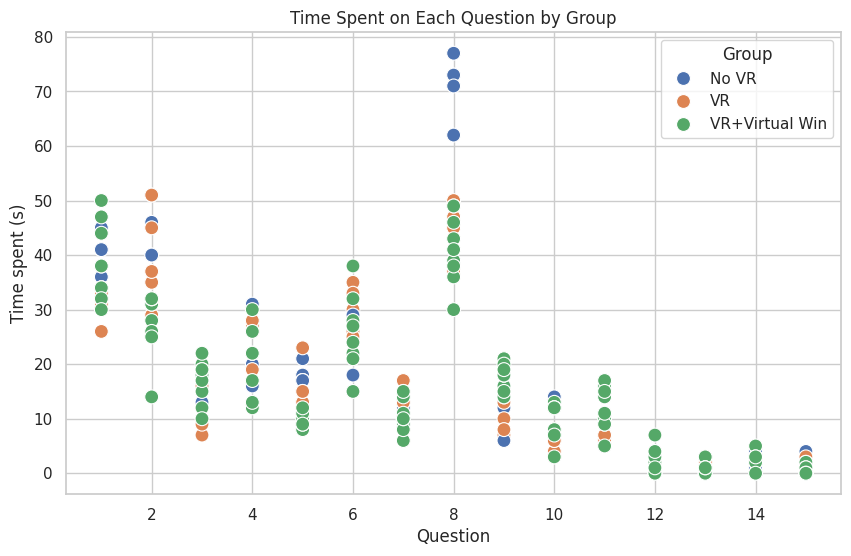

In [271]:
df_no_vr_time['Group'] = 'No VR'
df_vr_time['Group'] = 'VR'
df_vr_virtual_win_time['Group'] = 'VR+Virtual Win'

df_no_vr_time['Question'] = df_no_vr_time.index
df_vr_time['Question'] = df_vr_time.index
df_vr_virtual_win_time['Question'] = df_vr_virtual_win_time.index

combined_df = pd.concat([df_no_vr_time, df_vr_time, df_vr_virtual_win_time])

melted_df = pd.melt(combined_df, id_vars=['Question', 'Group'], value_name='Time')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='Question', y='Time', hue='Group', s=100)

plt.xlabel('Question')
plt.ylabel('Time spent (s)')
plt.legend(title='Group')
plt.title('Time Spent on Each Question by Group')
plt.show()
